# House Price Prediction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.For the same purpose, the company has collected a data set from the sale of houses in Australia.


### Problem Statement

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

The company wants to know:
 - Which variables are significant in predicting the price of a house, and
 - How well those variables describe the price of a house.
 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Business Objectives

1. Data Preprocessing
2. Exploratory Data Analysis
3. The given problem is exactly about predicting the house price, which is a real-valued value, thus it falls into the Regression Category
4. To understand how exactly the demands vary with different features
5. Model to be a good way for management to understand the demand dynamics of a new market.
6. Trying to regularize the model to get better house price prediction.

## Data Description

- `MSSubClass`: Identifies the type of dwelling involved in the sale.	
- `MSZoning`: Identifies the general zoning classification of the sale.	
- `LotFrontage`: Linear feet of street connected to property
- `LotArea`: Lot size in square feet
- `Street`: Type of road access to property       	
- `Alley`: Type of alley access to property		
- `LotShape`: General shape of property     
- `LandContour`: Flatness of the property
- `Utilities`: Type of utilities available
- `LotConfig`: Lot configuration
- `LandSlope`: Slope of property
- `Neighborhood`: Physical locations within Ames city limits			
- `Condition1`: Proximity to various conditions
- `Condition2`: Proximity to various conditions (if more than one is present)
- `BldgType`: Type of dwelling	
- `HouseStyle`: Style of dwelling
- `OverallQual`: Rates the overall material and finish of the house
- `OverallCond`: Rates the overall condition of the house
- `YearBuilt`: Original construction date
- `YearRemodAdd`: Remodel date (same as construction date if no remodeling or additions)
- `RoofStyle`: Type of roof
- `RoofMatl`: Roof material
- `Exterior1st`: Exterior covering on house
- `Exterior2nd`: Exterior covering on house (if more than one material)	
- `MasVnrType`: Masonry veneer type
- `MasVnrArea`: Masonry veneer area in square feet
- `ExterQual`: Evaluates the quality of the material on the exterior 
- `ExterCond`: Evaluates the present condition of the material on the exterior
- `Foundation`: Type of foundation
- `BsmtQual`: Evaluates the height of the basement
- `BsmtCond`: Evaluates the general condition of the basement
- `BsmtExposure`: Refers to walkout or garden level walls
- `BsmtFinType1`: Rating of basement finished area
- `BsmtFinSF1`: Type 1 finished square feet
- `BsmtFinType2`: Rating of basement finished area (if multiple types)
- `BsmtFinSF2`: Type 2 finished square feet
- `BsmtUnfSF`: Unfinished square feet of basement area
- `TotalBsmtSF`: Total square feet of basement area
- `Heating`: Type of heating
- `HeatingQC`: Heating quality and condition
- `CentralAir`: Central air conditioning
- `Electrical`: Electrical system
- `1stFlrSF`: First Floor square feet
- `2ndFlrSF`: Second floor square feet
- `LowQualFinSF`: Low quality finished square feet (all floors)
- `GrLivArea`: Above grade (ground) living area square feet
- `BsmtFullBath`: Basement full bathrooms
- `BsmtHalfBath`: Basement half bathrooms
- `FullBath`: Full bathrooms above grade
- `HalfBath`: Half baths above grade
- `Bedroom`: Bedrooms above grade (does NOT include basement bedrooms)
- `Kitchen`: Kitchens above grade
- `KitchenQual`: Kitchen quality
- `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
- `Functional`: Home functionality (Assume typical unless deductions are warranted)
- `Fireplaces`: Number of fireplaces
- `FireplaceQu`: Fireplace quality
- `GarageType`: Garage location
- `GarageYrBlt`: Year garage was built
- `GarageFinish`: Interior finish of the garage
- `GarageCars`: Size of garage in car capacity
- `GarageArea`: Size of garage in square feet
- `GarageQual`: Garage quality
- `GarageCond`: Garage condition
- `PavedDrive`: Paved driveway
- `WoodDeckSF`: Wood deck area in square feet
- `OpenPorchSF`: Open porch area in square feet
- `EnclosedPorch`: Enclosed porch area in square feet
- `3SsnPorch`: Three season porch area in square feet
- `ScreenPorch`: Screen porch area in square feet
- `PoolArea`: Pool area in square feet
- `PoolQC`: Pool quality
- `Fence`: Fence quality
- `MiscFeature`: Miscellaneous feature not covered in other categories
- `MiscVal`: $Value of miscellaneous feature
- `MoSold`: Month Sold (MM)
- `YrSold`: Year Sold (YYYY)
- `SaleType`: Type of sale
- `SaleCondition`: Condition of sale
- `SalePrice`: House price

According to our case study we can say that,

**Target Variable:** `SalePrice`


## Step 1 - Exploratory Data Analysis

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings  
warnings.filterwarnings('ignore') # to ignore the warnings

pd.set_option("display.max_columns",None) # to display all columns 
pd.set_option("display.max_rows",None) # to display all rows

Taking a glance through the data file i.e. **train.csv** file, we can see that first column is `Id` which can be ignored. As it is just a number which indicates the no. of records and can be used as index rather than considering it into the data.

In [2]:
# Loading the data
data = pd.read_csv('train.csv',index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Data dimensions
print(data.shape)

(1460, 80)


The data consists of **1460** records and **80** columns

In [4]:
# dropping duplicate values if any
data.drop_duplicates(inplace = True)
print(data.shape)

(1460, 80)


We can see that there are no duplicates in our dateset.


In [5]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# Columns in the data
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Deleting the columns `MoSold`, `YrSold`, `SaleType` and `SaleCondition` as these columns represents after the sale of house. It means that while computing we would not have the data regarding these columns. It is better to delete it.

In [7]:
# Deleting columns
data.drop(['MoSold', 'YrSold', 'SaleType', 'SaleCondition'],axis = 1,inplace = True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,250000


In [8]:
#By glancing the data we can see that utilites are having 2 unique values.
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

We can observe that `Utilities` are being biased and we cannot use it to compute due to data insufficiency.

In [9]:
data.drop(['Utilities'],axis = 1,inplace = True)

In [10]:
# Checking the null values in the data
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

We can see that column - `Electrical` has one null value. It might be due to some human error as we all know that now a days there is no house without electricity or electrical connections which are for sale.

In [11]:
data[data['Electrical'].astype(str) == 'nan']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,167500


In [12]:
data = data[data['Electrical'].astype(str) != 'nan']

In [13]:
# Checking the null values in the data
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1368
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [14]:
# filling null values to its appropiate labels.
data['Alley'] = data['Alley'].fillna('No alley access')
data['MasVnrType'] = data['MasVnrType'].fillna('None') # missing values are very less so we can fill na with none
data['MasVnrArea'] = data['MasVnrArea'].fillna(0) # we know that if MasVnrType is none then MasVnrArea would be zero

data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('No Basement')

data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')

data[['GarageType','GarageFinish','GarageQual','GarageCond']] = data[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('No Garage')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

data['PoolQC'] = data['PoolQC'].fillna('No Pool')
data['Fence'] = data['Fence'].fillna('No Fence')
data['MiscFeature'] = data['MiscFeature'].fillna('None')


In [15]:
# Checking the null values in the data
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [16]:
data_missing = pd.DataFrame((round(100*(data.isnull().sum()/len(data.index)), 2)), columns=['Missing Values'])
data_missing[data_missing['Missing Values']>0]

,Missing Values
LotFrontage,17.75


In [17]:
# we observe that only lot frontage is having missing values.
data['LotFrontage'].describe()

count    1200.000000
mean       70.047500
std        24.294727
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
# filling the null values with median
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [19]:
# Checking the null values in the data
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [20]:
# checking the data types of all the features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [21]:
# we can observe that garage built year cannot be object. Therefore, we have to convert it to int.
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)

# Checking whether the data type is corrected or not.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

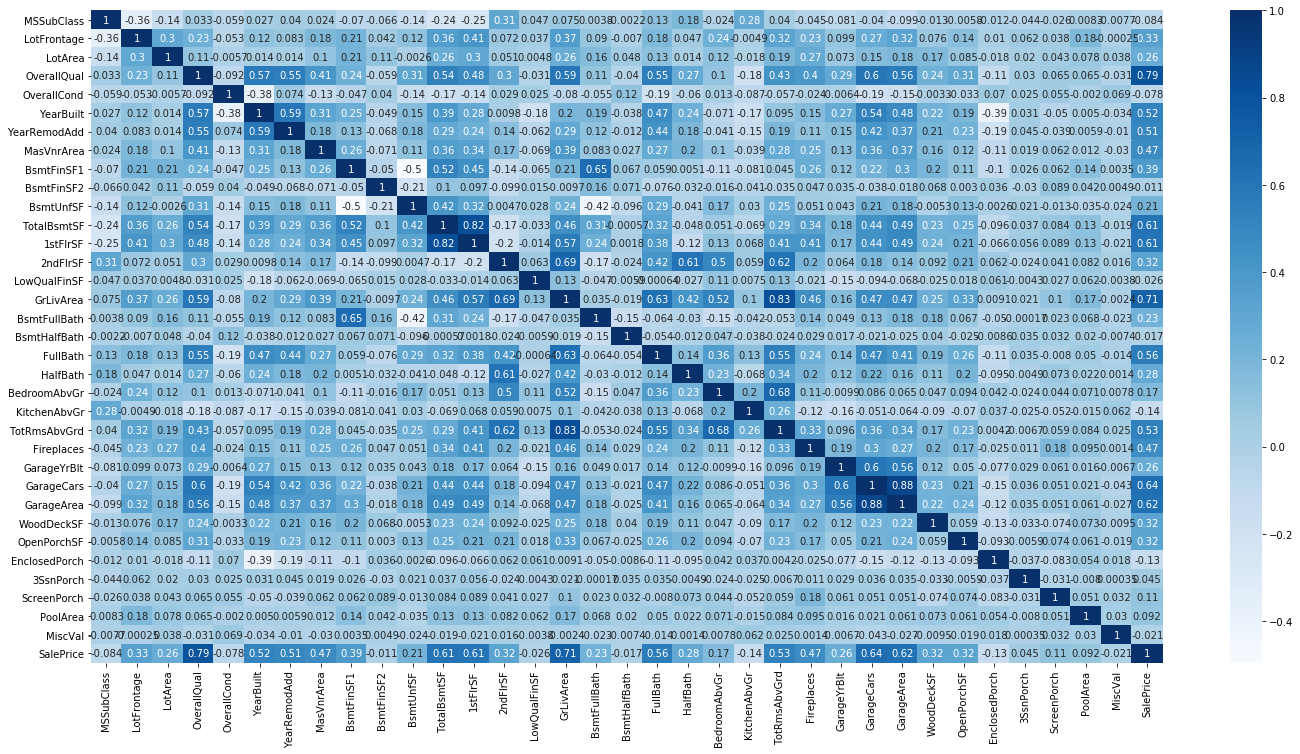

In [22]:
# Checking for correlation
plt.figure(figsize = (24,12))
sns.heatmap(data.corr(),annot = True,cmap = 'Blues')
plt.show()

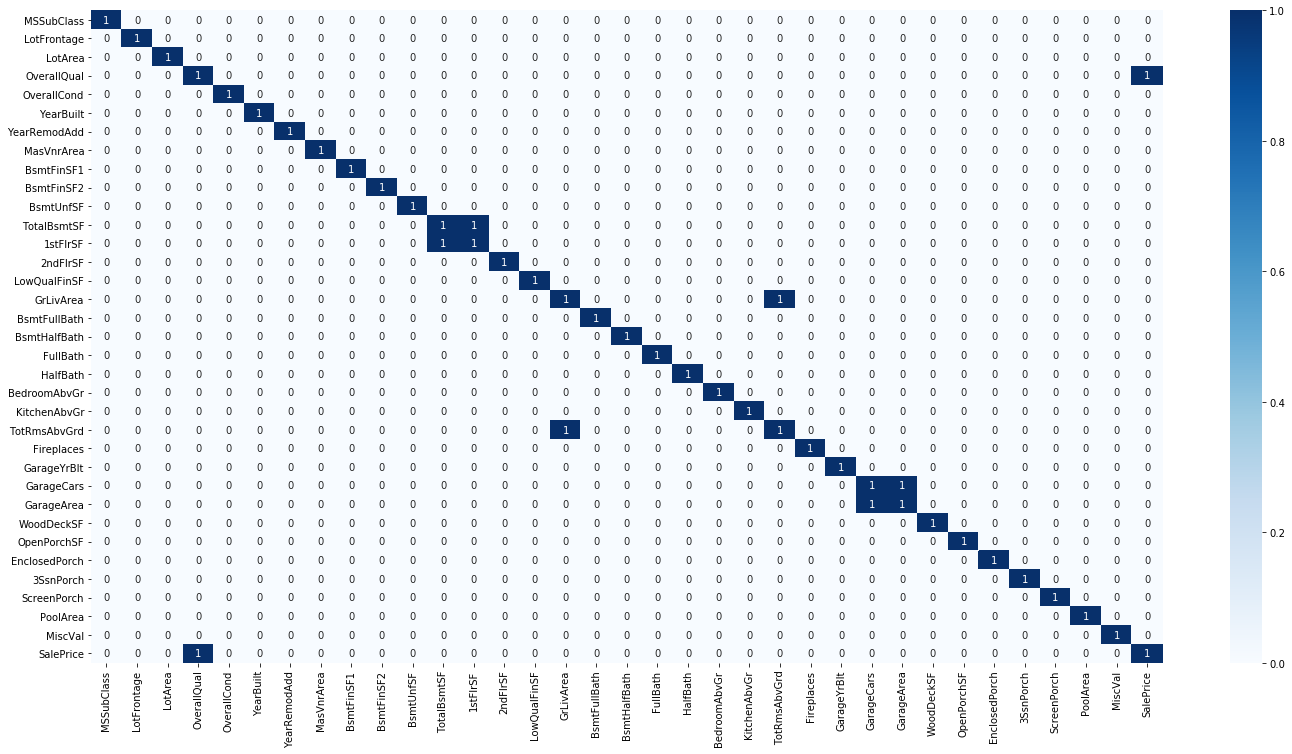

In [23]:
# we can see that there are some columns which are correlated to each other but we are not able to identify it.
# ploting Heatmap for data.corr() >0.75
# Checking for correlation
plt.figure(figsize = (24,12))
sns.heatmap((data.corr()>0.75),annot = True,cmap = 'Blues')
plt.show()

- We can see that `GarageCars` and `GarageArea` are correlated to each other we can delete `GarageCars` as it can be explained by Garage area.
- We can see that `GrLivArea` and `TotRmsAbvGrd` are correlated to each other we can delete `GrLivArea` as it can be explained by TotRmsAbvGrd.
- We can see that `1stFlrSF` and `TotalBsmtSF` are correlated to each other we can delete `1stFlrSF` as it can be explained by TotalBsmtSF.

In [24]:
# Deleting columns
data.drop(['GarageCars', 'GrLivArea','1stFlrSF'],axis = 1,inplace = True)

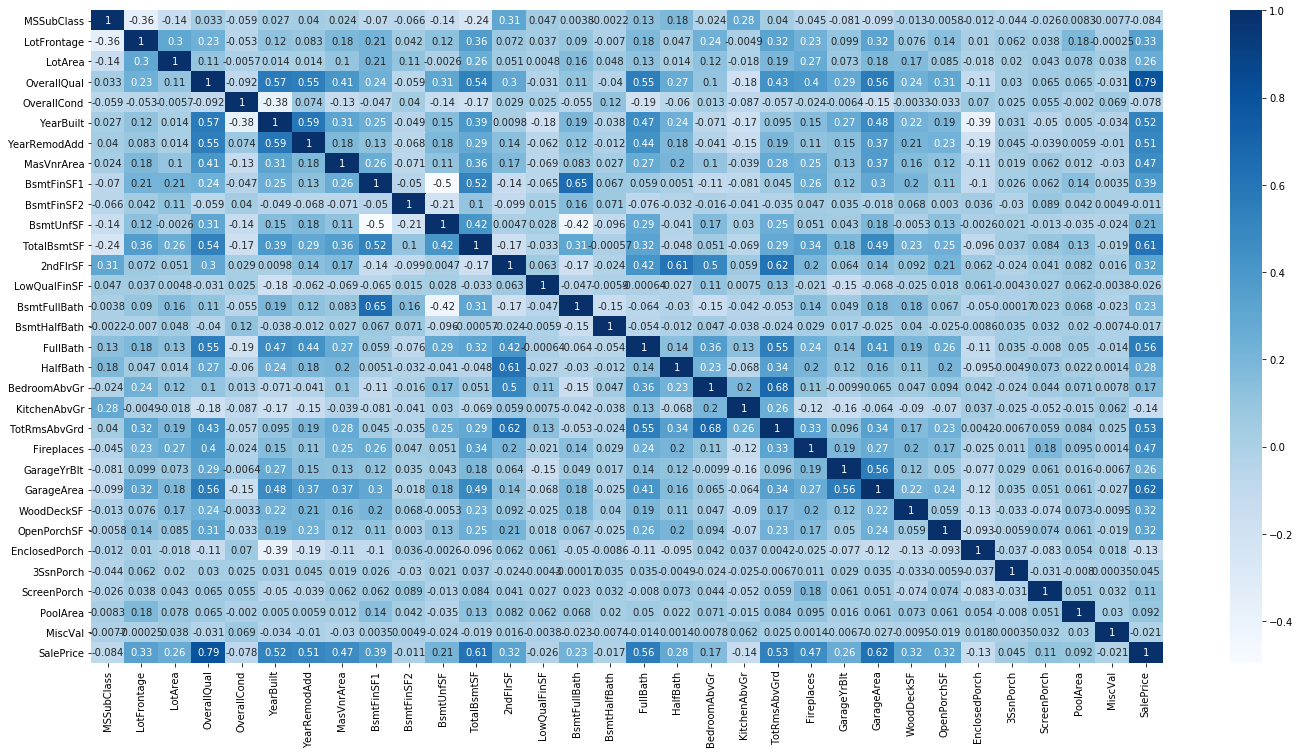

In [25]:
# Checking for correlation
plt.figure(figsize = (24,12))
sns.heatmap((data.corr()),annot = True,cmap = 'Blues')
plt.show()

We can observe that independent variables are not correlated anymore. So we can move forward with our data.

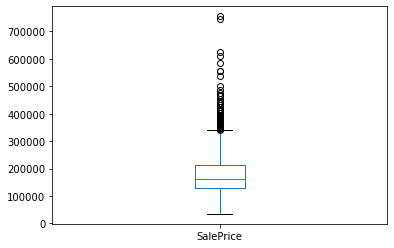

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
80%      230000.000000
90%      278000.000000
99%      442629.620000
max      755000.000000
Name: SalePrice, dtype: float64


In [26]:
# boxplot to see whether we have outliers in dependent variables.
data['SalePrice'].plot(kind = 'box')
plt.show()

print(data['SalePrice'].describe([0.25,0.5,0.75,0.8,0.9,0.99]))

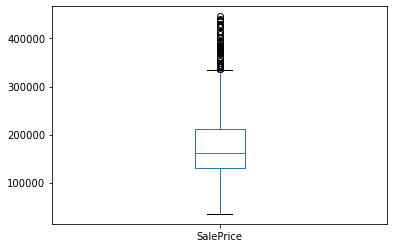

count      1445.000000
mean     177275.424221
std       69973.353808
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212000.000000
max      446261.000000
Name: SalePrice, dtype: float64


In [27]:
# From above description we can observe that 99% will give better result as we are not losing much of data.
# plotting boxplot to see whether we have reduced outliers in dependent variables.
data = data[data['SalePrice'] <= 450000]
data['SalePrice'].plot(kind = 'box')
plt.show()

print(data['SalePrice'].describe())


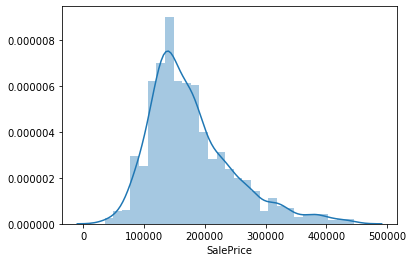

In [28]:
# checking the distribution of the dependent variables
sns.distplot(data['SalePrice'])

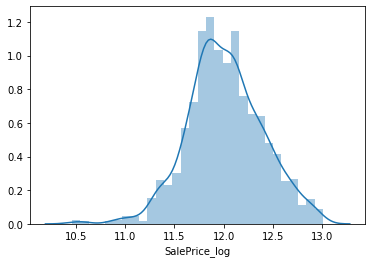

In [29]:
# we can observe that it is right skewed therefore converting it to normally distributed by applying log function on it.

data['SalePrice_log'] = np.log(data['SalePrice'])

# plotting the graph
sns.distplot(data['SalePrice_log'])

We can see that now dependent variable is normally distributed.

**According to Overall finish of house**

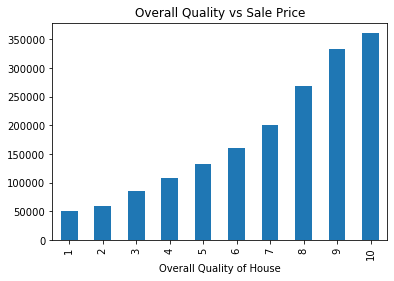

In [30]:
data1 = data.groupby(by = 'OverallQual')['SalePrice'].median()
data1.plot(kind = 'bar')
plt.xlabel('Overall Quality of House')
plt.title('Overall Quality vs Sale Price')
plt.show()

We can observe that as quality of house increases the sale price increases. It can be very good indicator to predict sales price.

**According to general zoning**

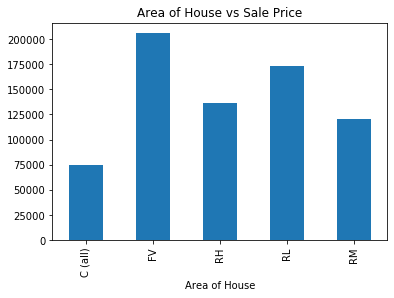

In [31]:
data1 = data.groupby(by = 'MSZoning')['SalePrice'].median()
data1.plot(kind = 'bar')
plt.xlabel('Area of House')
plt.title('Area of House vs Sale Price')
plt.show()

We can observe that most of the sold property are from floating village residential and residential with low density. It might be due to most of the people might want to live in peace and away from population.

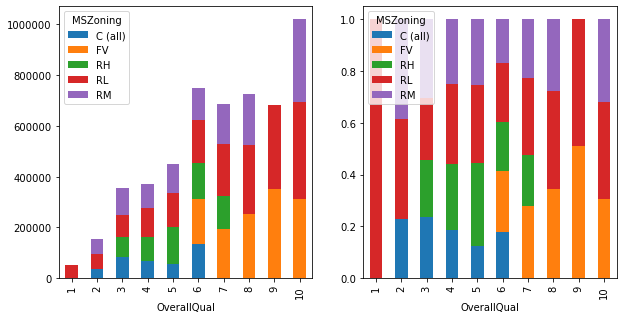

In [32]:
data1 = data.groupby(by = ['OverallQual','MSZoning'])['SalePrice'].median()
data1 = data1.unstack()
data1_perc = data1.apply(lambda x: x/x.sum(),axis = 1)

figure, (ax1,ax2) = plt.subplots(1, 2,figsize = (10,5))
data1.plot(kind = 'bar',stacked = True,ax = ax1)
data1_perc.plot(kind = 'bar',stacked = True,ax = ax2)
plt.show()

As per above graph, we can see that all of the lower grade quality are in the residential area with low density and are way more cheaper compared to other houses.

**According to Pool**

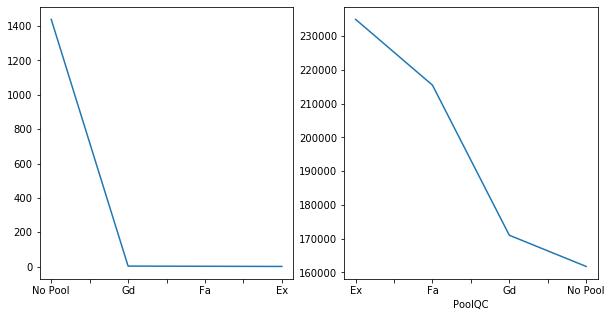

In [33]:
data1 = data.groupby(by = 'PoolQC')['SalePrice'].median()
figure, (ax1,ax2) = plt.subplots(1, 2,figsize = (10,5))
data.PoolQC.value_counts().plot(ax = ax1)
data1.plot(ax = ax2)
plt.show()

We can observe that the value count of house having pool is less, but having pool in house is affecting the sale price. Hence we cannot remove the Pool feature from the dataset.

**According to Fence of the house**

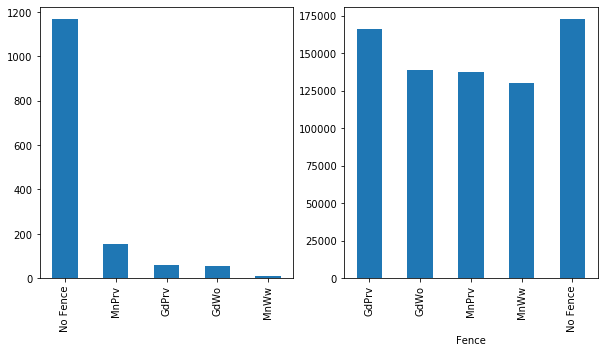

In [34]:
data1 = data.groupby(by = 'Fence')['SalePrice'].median()
figure, (ax1,ax2) = plt.subplots(1, 2,figsize = (10,5))
data.Fence.value_counts().plot(kind = 'bar',ax = ax1)
data1.plot(kind='bar',ax = ax2)
plt.show()

We can observe that the count of 'no fence' is high and 'GdPrv' is very less, but the sale price of both category are almost the same. We can say that people are willing to pay more for good privacy as well as no privacy.

**According to Miscellaneous Features of the house**

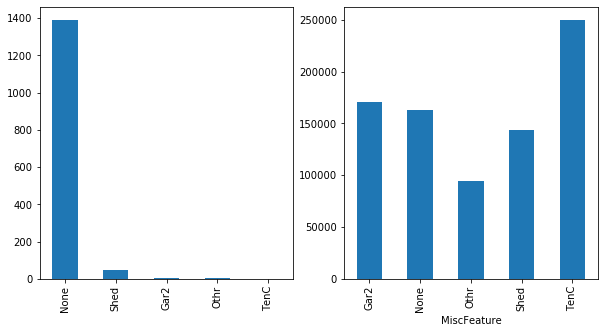

In [35]:
data1 = data.groupby(by = 'MiscFeature')['SalePrice'].median()
figure, (ax1,ax2) = plt.subplots(1, 2,figsize = (10,5))
data.MiscFeature.value_counts().plot(kind = 'bar',ax = ax1)
data1.plot(kind='bar',ax = ax2)
plt.show()

We can see that most of the houses don't have any miscellaneous feature. House having Tennis court(TenC) or 2nd Garage(Gar2) has better sale price compare to rest of miscellaneous features.

**According to Year of house built**

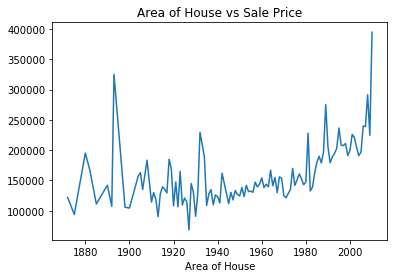

In [36]:
data1 = data.groupby(by = 'YearBuilt')['SalePrice'].median()
data1.plot()
plt.xlabel('Area of House')
plt.title('Area of House vs Sale Price')
plt.show()

We can see that newer the house the sale price increases.

**According to House remodelled or not**

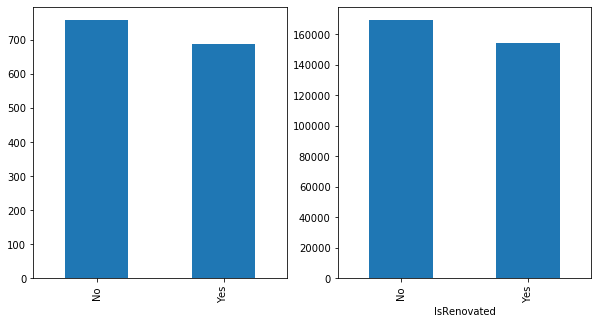

In [37]:
data1 = data.copy()
def checkForRenovation(data):
    if(data['YearBuilt'] == data['YearRemodAdd']):
        return 'No'
    elif(data['YearBuilt'] < data['YearRemodAdd']):
        return 'Yes'
data1['IsRenovated'] = data1.apply(checkForRenovation,axis = 1)

data2 = data1.groupby(by = 'IsRenovated')['SalePrice'].median()
figure, (ax1,ax2) = plt.subplots(1, 2,figsize = (10,5))
data1.IsRenovated.value_counts().plot(kind = 'bar',ax = ax1)
data2.plot(kind='bar',ax = ax2)
plt.show()

As per above graph we can say that older house which are not renovated are having high sale price compare to renovated house.

## Step 2 - Model Building

In [38]:
# deleting the SalePrice Column as we have converted it into its log format.
del data['SalePrice']

**Creating Dummy Variables**

In [39]:
# Converting the binary variable to numeric
data['Street'] = data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
data['CentralAir'] = data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
data['PavedDrive'] = data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0) 
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice_log
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,1,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,854,0,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003,RFn,548,TA,TA,1,0,61,0,0,0,0,No Pool,No Fence,None,0,12.247694
2,20,RL,80.0,9600,1,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,0,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,460,TA,TA,1,298,0,0,0,0,0,No Pool,No Fence,None,0,12.109011
3,60,RL,68.0,11250,1,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,608,TA,TA,1,0,42,0,0,0,0,No Pool,No Fence,None,0,12.317167
4,70,RL,60.0,9550,1,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,756,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,642,TA,TA,1,0,35,272,0,0,0,No Pool,No Fence,None,0,11.849398
5,60,RL,84.0,14260,1,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,836,TA,TA,1,192,84,0,0,0,0,No Pool,No Fence,None,0,12.429216


In [40]:
# collecting all the categorical variable in one variable so that we can perform 'get_dummies' on our dataset
categorical_var = data.select_dtypes(include=['object'])

print(categorical_var.columns)

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')


In [41]:
categorical_var.shape

(1445, 37)

We can do one hot encoding to categorical variables as python requires all data in numeric for model building.

In [42]:
cat_dummies = pd.get_dummies(categorical_var, drop_first=True)
cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [43]:
# concatenating the dummy variable to data
data = pd.concat([data,cat_dummies], axis=1)
# removing the categorical variable columns as it has been converted
data.drop(list(categorical_var.columns),axis=1,inplace = True)

# printing the shape of the dataset
print(data.shape)


(1445, 240)


In [44]:
data.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice_log,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

**Train Test Split**

In [45]:
# We are splitting the data into 80-20 pattern as we have to give sufficient amount of data to train the model
df_train,df_test = train_test_split(data, train_size=0.8,test_size = 0.2, random_state=100)

In [46]:
y_train = df_train.pop('SalePrice_log')
X_train = df_train

print(X_train.shape)
print(y_train.shape)

(1156, 239)
(1156,)


In [47]:
y_test = df_test.pop('SalePrice_log')
X_test = df_test

print(X_test.shape)
print(y_test.shape)

(289, 239)
(289,)


**Scaling the numeric data**

To give equal importance to every independent variables

In [48]:
numeric_col=X_train.select_dtypes(include=['int64','float64']).columns

# scaling the data
scaler = StandardScaler()
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

In [49]:
# RFE - There are 239 variables so we can keep top 20 variables.
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr, 20)
rfe = rfe.fit(X_train, y_train)

col=X_train.columns[rfe.support_]
print(col)

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RL', 'Neighborhood_BrDale',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_Stone', 'Heating_GasA', 'Heating_GasW', 'Heating_OthW',
       'Heating_Wall', 'Electrical_FuseP', 'Functional_Maj2', 'Functional_Sev',
       'PoolQC_Gd', 'MiscFeature_Othr'],
      dtype='object')


In [50]:
# building OLS model
X_train_rfe=X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)

#create first model
lr=sm.OLS(y_train,X_train_sm)

#fit the model
model_lr=lr.fit()

#Print the summary 
print(model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.81e-298
Time:                        17:49:13   Log-Likelihood:                 219.71
No. Observations:                1156   AIC:                            -397.4
Df Residuals:                    1135   BIC:                            -291.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.2719    

In [51]:
# predicting on train
X_train_new = X_train[col]
y_train_pred = model_lr.predict(X_train_sm)

# predicting on test
X_test_new = X_test[col]
X_test_sm = sm.add_constant(X_test_new)
y_test_pred = model_lr.predict(X_test_sm)

In [52]:
# R-Squared
r2_score_test_lm = r2_score(y_test,y_test_pred)
r2_score_train_lm = r2_score(y_train,y_train_pred)
print("The r2 score for train is {}".format(r2_score_train_lm))
print("The r2 score for test is {}".format(r2_score_test_lm))

The r2 score for train is 0.7218906752699488
The r2 score for test is 0.6765459477138612


In [53]:
# Mean Squared Error of Linear regression
rmsle_lm = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(rmsle_lm)

0.22648743039529207


### Lasso Regression

In [54]:
params = {'alpha': [0,0.001,0.01,0.1,1,10,100,1000,10000]}
lasso = Lasso()
folds = 5
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_rfe, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.16008773210534633


In [56]:
# Building lasso model
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
# predicting on train
y_train_pred = lasso.predict(X_train)

# predicting on test
y_test_pred = lasso.predict(X_test)

In [58]:
# R-Squared
r2_score_test_lasso = r2_score(y_test,y_test_pred)
r2_score_train_lasso = r2_score(y_train,y_train_pred)
print("The r2 score for train is {}".format(r2_score_train_lasso))
print("The r2 score for test is {}".format(r2_score_test_lasso))

The r2 score for train is 0.8934073017154263
The r2 score for test is 0.8488202699259187


In [59]:
# Mean Squared Error of Lasso
rmsle_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(rmsle_lasso)

0.15484050858269818


In [60]:
lasso_coef = pd.DataFrame(list(zip(X_train.columns,list(lasso.coef_))))
lasso_coef.columns = ['Feaure','Coef']
lasso_top10 = lasso_coef.sort_values(by='Coef',ascending=False).head(10)
lasso_top10

,Feaure,Coef
57,Neighborhood_Crawfor,0.125938
4,OverallQual,0.091773
116,Exterior1st_BrkFace,0.074131
67,Neighborhood_NridgHt,0.072989
73,Neighborhood_StoneBr,0.066771
14,2ndFlrSF,0.056006
6,YearBuilt,0.053078
166,BsmtExposure_Gd,0.051579
12,TotalBsmtSF,0.049932
5,OverallCond,0.047014


### Ridge Regression

In [61]:
params = {'alpha': [0,0.001,0.01,0.1,1,10,100,1000,10000]}
ridge = Ridge()
folds = 5
# cross validation
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

ridge_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [62]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 1}
-0.15946162985868834


In [63]:
# building ridge regression
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [64]:
# predicting on train
y_train_pred = ridge.predict(X_train)

# predicting on test
y_test_pred = ridge.predict(X_test)

In [65]:
# R-Squared
r2_score_test_ridge = r2_score(y_test,y_test_pred)
r2_score_train_ridge = r2_score(y_train,y_train_pred)
print("The r2 score for train is {}".format(r2_score_train_ridge))
print("The r2 score for test is {}".format(r2_score_test_ridge))

The r2 score for train is 0.9216196454696806
The r2 score for test is 0.8357551704913205


In [66]:
# Mean Squared Error of ridge
rmsle_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(rmsle_ridge)

0.1613926154687325


In [67]:
ridge_coef = pd.DataFrame(list(zip(X_train.columns,list(ridge.coef_))))
ridge_coef.columns = ['Feaure','Coef']
ridge_top10 = ridge_coef.sort_values(by='Coef',ascending=False).head(10)
ridge_top10 

,Feaure,Coef
230,PoolQC_No Pool,0.269684
107,RoofMatl_CompShg,0.238712
113,RoofMatl_WdShngl,0.210717
34,MSZoning_FV,0.186722
36,MSZoning_RL,0.177704
57,Neighborhood_Crawfor,0.168021
37,MSZoning_RM,0.158954
183,Heating_GasW,0.143113
35,MSZoning_RH,0.137984
106,RoofStyle_Shed,0.129211


In [68]:
from IPython.display import display_html 
lasso_styler = lasso_top10.style.set_table_attributes("style='display:inline'").set_caption('Lasso Coefficients')
ridge_styler = ridge_top10.style.set_table_attributes("style='display:inline'").set_caption('Ridge Coefficients')

print("Top 10 Variables for both regression are: ")
display_html(lasso_styler._repr_html_()+'\t'+ridge_styler._repr_html_(), raw=True)

Top 10 Variables for both regression are: 


,Feaure,Coef
57,Neighborhood_Crawfor,0.125938
4,OverallQual,0.091773
116,Exterior1st_BrkFace,0.074131
67,Neighborhood_NridgHt,0.072989
73,Neighborhood_StoneBr,0.066771
14,2ndFlrSF,0.056006
6,YearBuilt,0.053078
166,BsmtExposure_Gd,0.051579
12,TotalBsmtSF,0.049932
5,OverallCond,0.047014


## Conclusion

In [69]:
from prettytable import PrettyTable
from simple_colors import black
x = PrettyTable()

x.field_names = ["Models", "HyperParameter used","Alpha value", "RMSLE","r2 Score(Train)","r2 Score(Test)"]

x.add_row(["Linear Regression(RFE)", "---",'---', 0.2265,0.722,0.676])
x.add_row(["Lasso Regression", "alpha",0.001, 0.1548,0.893,0.845])
x.add_row(["Ridge Regression","alpha" ,1, 0.1614,0.922,0.836])

print(black('Summary of all models are as follows- \n', ['bold']))
print(x)

Summary of all models are as follows- 

+------------------------+---------------------+-------------+--------+-----------------+----------------+
|         Models         | HyperParameter used | Alpha value | RMSLE  | r2 Score(Train) | r2 Score(Test) |
+------------------------+---------------------+-------------+--------+-----------------+----------------+
| Linear Regression(RFE) |         ---         |     ---     | 0.2265 |      0.722      |     0.676      |
|    Lasso Regression    |        alpha        |    0.001    | 0.1548 |      0.893      |     0.845      |
|    Ridge Regression    |        alpha        |      1      | 0.1614 |      0.922      |     0.836      |
+------------------------+---------------------+-------------+--------+-----------------+----------------+


We have done Data cleaning, Exploratory data analysis and built different types of Model to get better insights of data and accuracy to predict.

As per above summary table we can say that
- Out of all the models we applied, **Lasso Regression** with alpha = 0.001, gave us the **best** and the **lowest** RMSLE value **0.1548**

- Hence based on Lasso, the factors that generally affect the price are the Physical locations within Ames city limits(`Neighborhood`), Overall quality and finishing of the house(`OverallQual`), Exterior covering on house(`Exterior1st`), on which year the house was built(`YearBuilt`).

